In [1]:
import torch

In [2]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [3]:
from torchvision import transforms, datasets

In [4]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [5]:
test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [6]:
train

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: 
    Transforms (if any): Compose(
                             ToTensor()
                         )
    Target Transforms (if any): None

In [7]:
#iterating over the dataset 
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

In [8]:
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [9]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [10]:
x, y = data[0][0],data[1][0]

In [11]:
print(y)

tensor(3)


In [12]:
data[0][0].shape

torch.Size([1, 28, 28])

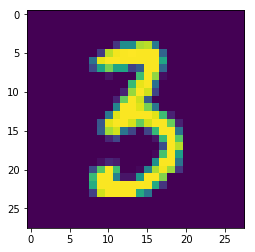

In [13]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))

In [14]:
# checking label for output , output is balanced or not 
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

In [15]:
for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

In [16]:
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [17]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


In [18]:
import torch.nn as nn #torch.nn gives access to neural network things like  layers
import torch.nn.functional as F # give access to function like relu

In [19]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1) # finally layer we will use softmax 

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [20]:
#activation functions are keeping our data scaled between 0 and 1.
# just an example.
t1= torch.rand((28,28))
t1= t1.view(-1,28*28)
output = net(t1)
output

tensor([[-2.3806, -2.3096, -2.3491, -2.2344, -2.2219, -2.3972, -2.2282, -2.4475,
         -2.2750, -2.2136]], grad_fn=<LogSoftmaxBackward>)

In [21]:
import torch.optim as optim
# loss function and optimiser
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [22]:
torch.cuda.current_device()

0

In [23]:
torch.cuda.get_device_name(0)

'GeForce GTX 1650'

In [24]:
torch.cuda.set_device(0)# setting gpu

In [25]:
for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.4982, grad_fn=<NllLossBackward>)
tensor(0.0835, grad_fn=<NllLossBackward>)
tensor(0.0025, grad_fn=<NllLossBackward>)


In [26]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1


In [27]:
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.966


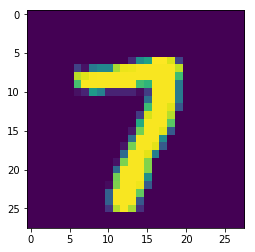

In [28]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [30]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(7)


In [31]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)
biggest_index = torch.argmax(first_pred)
print(biggest_index)

tensor([-2.5095e+01, -1.4591e+01, -1.0838e+01, -1.2691e+01, -2.2292e+01,
        -2.2176e+01, -4.7869e+01, -2.3246e-05, -2.1595e+01, -1.9245e+01],
       grad_fn=<SelectBackward>)
tensor(7)
